In [1]:
                                          
#####  #   #  #####   ###   #####  #####                ##     #####  ####   #####  #####  #####  #####  #####   ### 
  #    ## ##  ##  #  #   #  ##  #    #                  ##       #    ##  #  ##  #  #   #  ##  #    #    ##     #    
  #    # # #  #####  #   #  #####    #                  ##       #    ####   #####  #####  #####    #    ####    ### 
  #    #   #  ##     #   #  ## #     #                  ##       #    ##  #  ## #   #   #  ## #     #    ##         #
#####  #   #  ##      ###   ##  #    #                  #####  #####  ####   ##  #  #   #  ##  #  #####  #####   ### 

#####################################################################################################################      
import torch
import torch_geometric
from torch_geometric.data import Data
import networkx as nx

In [2]:
####   #####  #####  #####  #   #  #####          #####           ####  #####  #####  #####  ##  ##
##  #  ##     ##       #    ##  #  ##             #   #          #      ##  #  #   #  ##  #  ##  ##
##  #  ####   ####     #    # # #  ####           #####          ####   #####  #####  #####  ######
##  #  ##     ##       #    #  ##  ##             #   #          #   #  ## #   #   #  ##     ##  ##
####   #####  ##     #####  #   #  #####          #   #           ###   ##  #  #   #  ##     ##  ##

####################################################################################################
#a graph with4 nodes
edge_list=torch.tensor([
                        [0,0,0,1,2,2,3,3], #Source Nodes
                        [1,2,3,0,0,3,2,0] #Target Nodes
                            ],dtype=torch.long)  #This is an undirected Graph

# 6 Features for each node 4x6 (4 Nodes *  6 Features for each node): Nodes={0,1,2,3}

node_features=torch.tensor([
                            [-7,  8, -1, -5,  9,  3], #Features of Node "0"
                            [-2, -7,  5,  8,  2,  4], #Features of Node "1"
                            [ 8,  0, -4,-10,  5,  0], #Features of Node "2"
                            [ 3, -8, -9, -6,  8,  1], #Features of Node "3"
                                ],dtype=torch.long)

# 1 Weight for each edge

edge_weight=torch.tensor([
                          [35.], # Weight for nodes (0,1)
                          [48.], # Weight for nodes (0,2)
                          [10.], # Weight for nodes (0,3)
                          [70.], # Weight for nodes (1,0)
                          [5. ], # Weight for nodes (2,0)
                          [15.], # Weight for nodes (2,3)
                          [12.], # Weight for nodes (3,2)
                          [8. ], # Weight for nodes (3,0)
                            ],dtype=torch.float16)

In [3]:
#   #  #####  ##  #  #####         ####  #####  #####  #####  ##  ##
## ##  #   #  ## #   ##           #      ##  #  #   #  ##  #  ##  ##
# # #  #####  ##     ####         ####   #####  #####  #####  ######
#   #  #   #  ## #   ##           #   #  ## #   #   #  ##     ##  ##
#   #  #   #  ##  #  #####         ###   ##  #  #   #  ##     ##  ##

####################################################################

# Make a Data Object to store Graph information
data=Data(x=node_features,edge_index=edge_list,edge_attr=edge_weight)

In [4]:
 ####  #####  #####  #####  ##  ##          #####  #   #  #####   ### 
#      ##  #  #   #  ##  #  ##  ##            #    ##  #  ##     #   #
####   #####  #####  #####  ######            #    # # #  ####   #   #
#   #  ## #   #   #  ##     ##  ##            #    #  ##  ##     #   #
 ###   ##  #  #   #  ##     ##  ##          #####  #   #  ##      ### 

######################################################################
print("Number of nodes:\t\t",data.num_nodes)
print("Number of edges:\t\t",data.num_edges)
print("Number of features per node:\t",data.num_features) #per nodes (Length of each feature vector)
print("Number of weights per edge:\t",data.num_edge_features)

Number of nodes:		 4
Number of edges:		 8
Number of features per node:	 6
Number of weights per edge:	 1


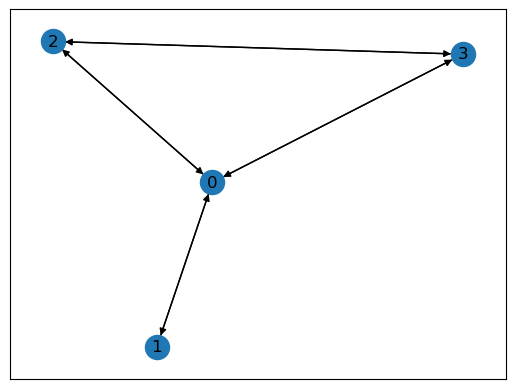

In [5]:
#####  ##      ###   #####        #####  ##  ##  #####         ####  #####  #####  #####  ##  ##
##  #  ##     #   #    #            #    ##  ##  ##           #      ##  #  #   #  ##  #  ##  ##
#####  ##     #   #    #            #    ######  ####         ####   #####  #####  #####  ######
##     ##     #   #    #            #    ##  ##  ##           #   #  ## #   #   #  ##     ##  ##
##     #####   ###     #            #    ##  ##  #####         ###   ##  #  #   #  ##     ##  ##

################################################################################################
G = torch_geometric.utils.to_networkx(data) #to_undirected=True is optional
nx.draw_networkx(G)
# We can also use:  "nx.draw(G)"